# Feature Engineering: Distance to Coastline
This notebook begins by wiring in the coastline distance function so we can derive a new feature: the distance (in km) from each event to the nearest coastline. We’ll import the function from our helper module and get it ready for use in later steps.

In [6]:
# Import coastline distance function from helper file
from pathlib import Path
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
from calculate_distance_coastline import get_distance_to_coast_ddm
from calculate_ocean import is_ocean

In [27]:
raw_path = Path.cwd().parent / "data" / "raw" / "1" / "earthquake_data_tsunami_updated.csv"
data_df = pd.read_csv(raw_path)

In [28]:
# If the point is not in ocean, calculate distance to coastline
data_df["distance_to_coast_km"] = data_df.apply(lambda r: get_distance_to_coast_ddm(r["latitude"], r["longitude"]) if not is_ocean(r["latitude"], r["longitude"]) else 0, axis=1)
data_df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,distance_to_coast_km
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1,0.0
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0,0.0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1,0.0
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1,0.0
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1,0.0


### Now we can explore this feature further.

In [35]:
mean_distance = data_df.groupby("tsunami")["distance_to_coast_km"].mean()
print(mean_distance.values)


[158.64186129  17.50682151]


### Mean values show significant difference between classes

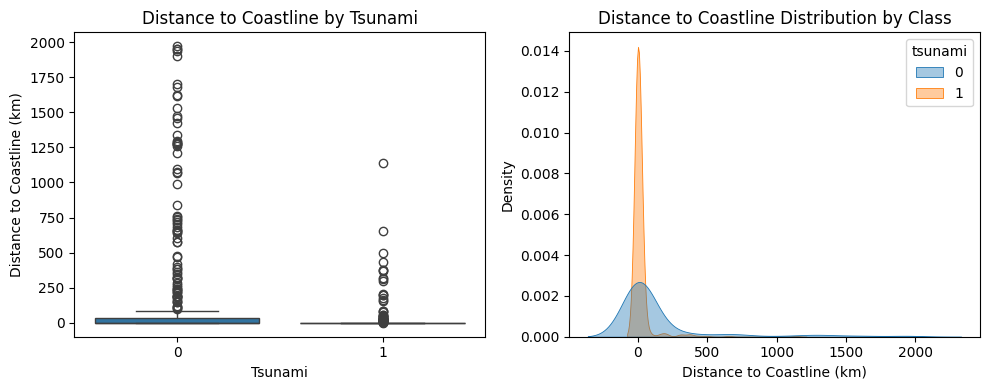

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.boxplot(data=data_df, x='tsunami', y='distance_to_coast_km', ax=ax[0])
ax[0].set_title('Distance to Coastline by Tsunami'); ax[0].set_xlabel('Tsunami'); ax[0].set_ylabel('Distance to Coastline (km)')

sns.kdeplot(data=data_df, x='distance_to_coast_km', hue='tsunami', common_norm=False, fill=True, alpha=0.4, linewidth=0.6, ax=ax[1])
ax[1].set_title('Distance to Coastline Distribution by Class'); ax[1].set_xlabel('Distance to Coastline (km)')

plt.tight_layout()
plt.show()